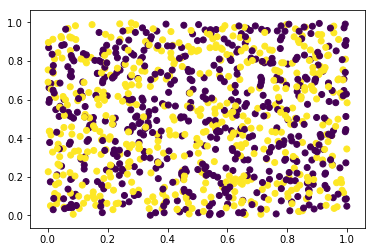

In [36]:
import numpy as np

x_train = np.random.random((1000,12))
y_train = np.random.randint(2, size=(1000,1))
x_test = np.random.random((100,12))
y_test = np.random.randint(2, size=(100,1))


%matplotlib inline
import matplotlib.pyplot as plt

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_color = y_train.reshape(1000,)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

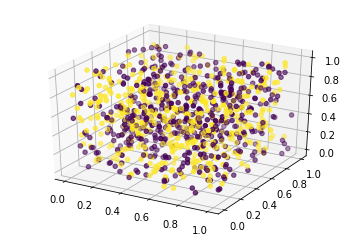

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
plot_color = y_train.reshape(1000,)

ax.scatter(plot_x, plot_y, plot_z,c=plot_color)
plt.show()

Epoch 1/500
1000/1000 [==============================] - 1s 501us/step - loss: 0.8665 - acc: 0.4890
Epoch 2/500
1000/1000 [==============================] - 0s 49us/step - loss: 0.8358 - acc: 0.4900
Epoch 3/500
1000/1000 [==============================] - 0s 50us/step - loss: 0.8126 - acc: 0.4940
Epoch 4/500
1000/1000 [==============================] - 0s 53us/step - loss: 0.7925 - acc: 0.5010
Epoch 5/500
1000/1000 [==============================] - 0s 38us/step - loss: 0.7752 - acc: 0.4950
Epoch 6/500
1000/1000 [==============================] - 0s 49us/step - loss: 0.7607 - acc: 0.5000
Epoch 7/500
1000/1000 [==============================] - 0s 38us/step - loss: 0.7478 - acc: 0.5010
Epoch 8/500
1000/1000 [==============================] - 0s 38us/step - loss: 0.7379 - acc: 0.4900
Epoch 9/500
1000/1000 [==============================] - 0s 36us/step - loss: 0.7301 - acc: 0.4950
Epoch 10/500
1000/1000 [==============================] - 0s 54us/step - loss: 0.7242 - acc: 0.4910
Epoch 11

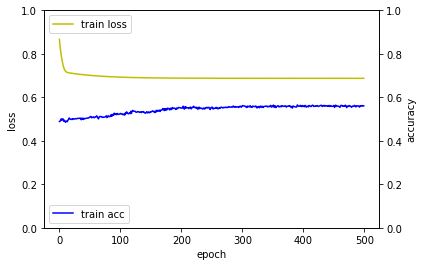

100/100 [==============================] - 0s 440us/step
loss_and_metrics : [0.70568378925323483, 0.46999999999999997]


In [41]:
#퍼셉트론 신경망 모델
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

x_train = np.random.random((1000,12))
y_train = np.random.randint(2, size=(1000,1))
x_test = np.random.random((100,12))
y_test = np.random.randint(2, size=(100,1))

model = Sequential()
model.add(Dense(1, input_dim=12,activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=500, batch_size=64)

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))